In [1]:
from vizic import *
import pandas as pd
import numpy as np
from ipywidgets import *
url = NotebookUrl()
url

In [3]:
c = Connection(url = url.nb_url)

In [4]:
g = GridLayer(c, collection="vizic", scale_r=2)
m = AstroMap(default_tiles=g, zoom=1)
cp = LayerColorPicker(layer=g, concise=True) # color picker (single)
p = PopupDis(layer=g) # catalog display for clicking
hb = HomeButton(m) # home button
s = SelectionTrig(m) # selection tool trigger
s.link()
get = GetDataButton(g) # retrieve data for selection
# color map
cdrop = CFDropdown(g); g.custom_c = True
# filter widget
f = FilterWidget(g)
g.filter_obj = True
f.link()

Mongodb collection name is vizic


In [5]:
# create custom GUI
accordion = Accordion(children=[cdrop, f, p])
accordion.set_title(2, 'Object Catalog')
accordion.set_title(0, 'Color by Property')
accordion.set_title(1, 'Filter Objects')
accordion.layout.width = '50%'
accordion.layout.overflow_x = 'scroll'

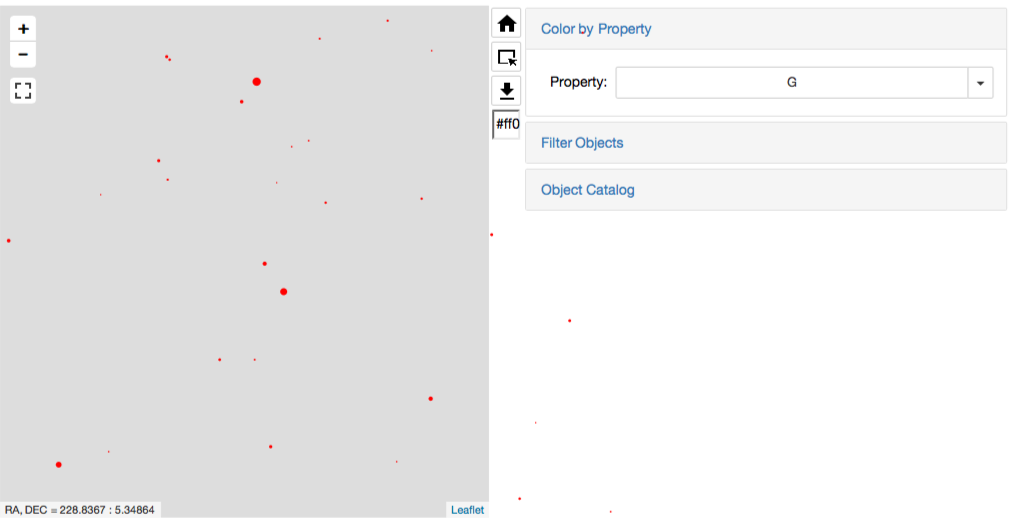

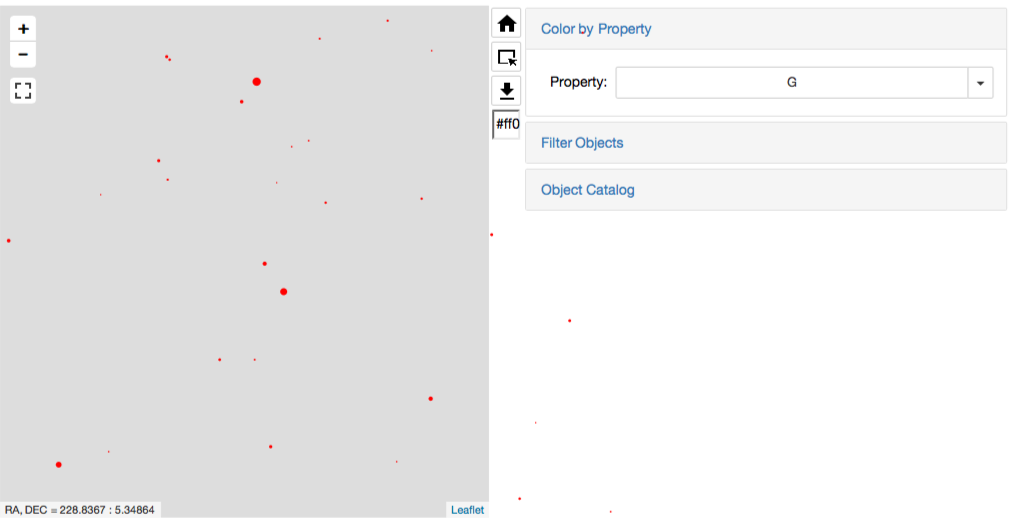

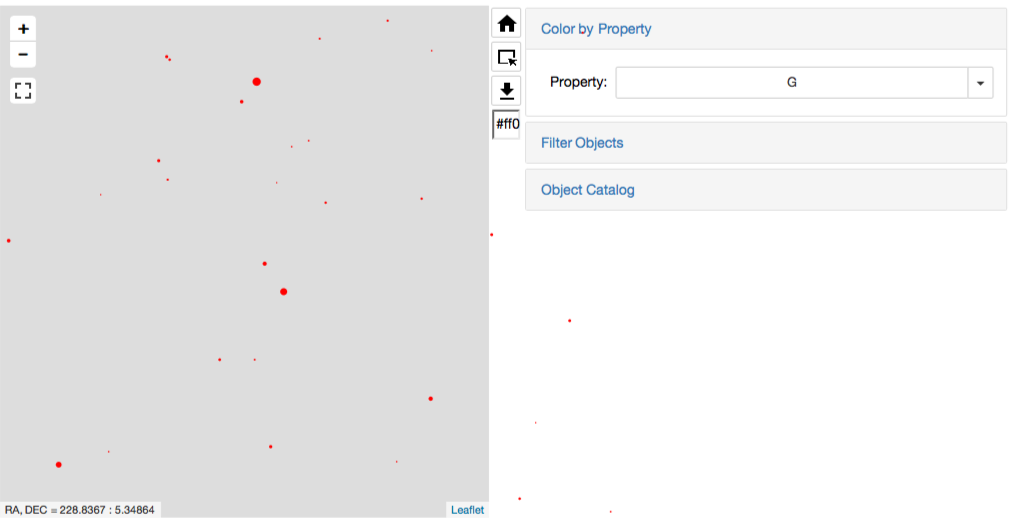

In [6]:
app = HBox([m, VBox([hb, s, get, cp]), accordion]); app

In [6]:
# selection tool return data
g.select_data.tail(n=2)

,CLEAN,DEC,G,I,OBJID,PETROR90_R,Q_R,R,RA,RADIUS,TYPE,U,U_R,Z,ZS
81,1.0,5.549199,18.54231,18.54231,1.237656e+18,7.376487,-0.002337,18.54231,228.77685,7.376487,3.0,18.54231,-0.04362,18.54231,0.080819
82,1.0,5.610237,19.21595,19.21595,1.237656e+18,7.001575,-0.000669,19.21595,228.72196,7.001575,3.0,19.21595,0.02225,19.21595,0.174043


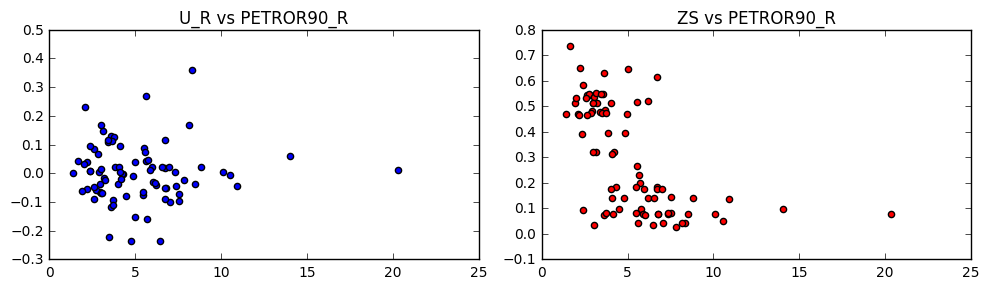

In [7]:
# explore patterns within returned catalog
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(1,2,1); ax1.scatter(g.select_data.PETROR90_R, g.select_data.U_R); ax1.set_title('U_R vs PETROR90_R')
ax2 = fig.add_subplot(1,2,2); ax2.scatter(g.select_data.PETROR90_R, g.select_data.ZS, c='r'); ax2.set_title('ZS vs PETROR90_R')
plt.tight_layout()